# Initialization

### install necessary libraries

In [ ]:
# Install essential Python packages
# every line start with "!" is executed in terminal

### upgrade basic libraries

In [ ]:
# libraries included in the colab usually are old and may affect our results
!pip install --upgrade pandas
!pip install --upgrade pandas_datareader
!pip install --upgrade matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 5.5 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 5.0 MB/s 
     |████████████████████████████████| 960 kB 44.2 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


## import libraries

In [ ]:
# pandas: for data processing support
import pandas as pd
from pandas import Series, DataFrame

# pandas_dataloader: for web data reading-in support
import pandas_datareader.data as web

# matplotlib: for visualising data
import matplotlib as mpl

# we can also use import matplotlib.pyplot as plt which is simpler
from matplotlib import pyplot as plt

# yfinance: an open-source tool that uses Yahoo's publicly available APIs
import yfinance as yf

# Basic stocks analysis

### exploratory data analysis 


In [ ]:
# declare start and end time
import datetime
start = datetime.datetime(2010,1,1)
end = datetime.datetime(2017,1,11) 

In [ ]:
# import the stock data of aapl from yahoo finance with the range of time stated
df = web.DataReader("AAPL", 'yahoo', start, end)

# inspect first 5 rows
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.526020
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.537304
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.433320
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.421425
2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.464119


In [ ]:
# inspect last 7 rows
df.tail(7)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,29.082500,28.690001,28.950001,29.037500,115127600.0,27.219835
2017-01-04,29.127501,28.937500,28.962500,29.004999,84472400.0,27.189369
2017-01-05,29.215000,28.952499,28.980000,29.152500,88774400.0,27.327635
2017-01-06,29.540001,29.117500,29.195000,29.477501,127007600.0,27.632290
2017-01-09,29.857500,29.485001,29.487499,29.747499,134247600.0,27.885384
2017-01-10,29.844999,29.575001,29.692499,29.777500,97848400.0,27.913513
2017-01-11,29.982500,29.650000,29.684999,29.937500,110354400.0,28.063499


In [ ]:
# generate descriptive statistics (e.g. central tendency and dispersion of the dataset)
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1769.000000,1769.000000,1769.000000,1769.000000,1.769000e+03,1769.000000
mean,20.072649,19.697763,19.894219,19.888647,3.758507e+08,17.692292
std,7.150999,7.038787,7.095451,7.094345,2.409303e+08,6.741325
min,7.000000,6.794643,6.870357,6.858929,4.590360e+07,5.856374
25%,13.994286,13.714286,13.863571,13.886071,1.958040e+08,11.856372
50%,19.888929,19.457857,19.768572,19.686787,3.218404e+08,17.218292
75%,26.342501,25.782499,26.020000,26.084999,4.837532e+08,23.873835
max,33.634998,32.849998,33.615002,33.250000,1.880998e+09,30.118956


In [ ]:
# prints a summary of the dataframe e.g. dtype, non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1769 entries, 2010-01-04 to 2017-01-11
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1769 non-null   float64
 1   Low        1769 non-null   float64
 2   Open       1769 non-null   float64
 3   Close      1769 non-null   float64
 4   Volume     1769 non-null   float64
 5   Adj Close  1769 non-null   float64
dtypes: float64(6)
memory usage: 96.7 KB


### moving windows

In [ ]:
# Isolate the closing prices
close_px = df['Adj Close']

# Calculate the moving average
mavg = close_px.rolling(window=100).mean()

# inspect the results
mavg.tail()

Date
2017-01-05    26.232371
2017-01-06    26.253438
2017-01-09    26.277268
2017-01-10    26.301753
2017-01-11    26.328064
Name: Adj Close, dtype: float64

### visualisation by using matplotlib

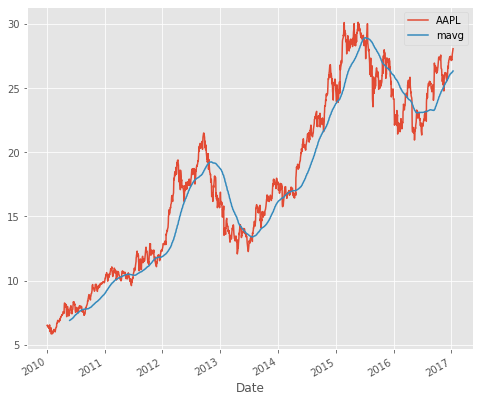

In [ ]:
%matplotlib inline
plt.style.use('ggplot')
mpl.rc('figure', figsize=(8,7))
close_px.plot(label='AAPL'), mavg.plot(label='mavg')
plt.legend()

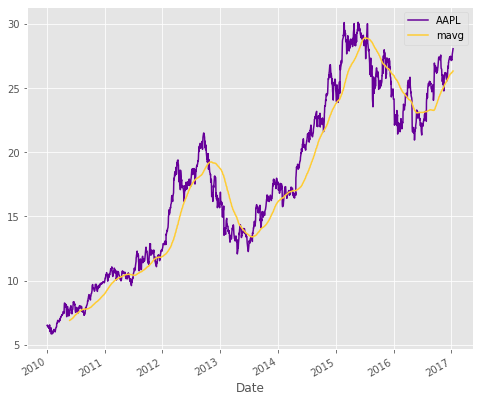

In [ ]:
# changing the default colors
close_px.plot(label='AAPL', color='#660099'), mavg.plot(label='mavg', color='#FFCC33')
plt.legend()

### return deviation (the 1st method)

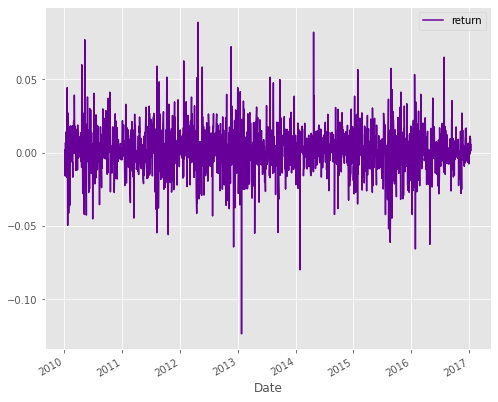

In [ ]:
# formula for returns
rets = close_px / close_px.shift(1) - 1

# plot the return graph
rets.plot(label='return', color='#660099')
plt.legend()

### return deviation (the 2nd method; the one we used in the slides)

In [ ]:
# set a ticker symbol and download the required stock data
ticker = 'AAPL'

# download stock data by using yfinance module
stock_data = yf.download(ticker, start, end)

# this method is the same as by using pandas datareader, so you would expect to get an exactly same table
stock_data.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-04,28.962500,29.127501,28.937500,29.004999,27.189369,84472400
2017-01-05,28.980000,29.215000,28.952499,29.152500,27.327635,88774400
2017-01-06,29.195000,29.540001,29.117500,29.477501,27.632288,127007600
2017-01-09,29.487499,29.857500,29.485001,29.747499,27.885387,134247600
2017-01-10,29.692499,29.844999,29.575001,29.777500,27.913513,97848400


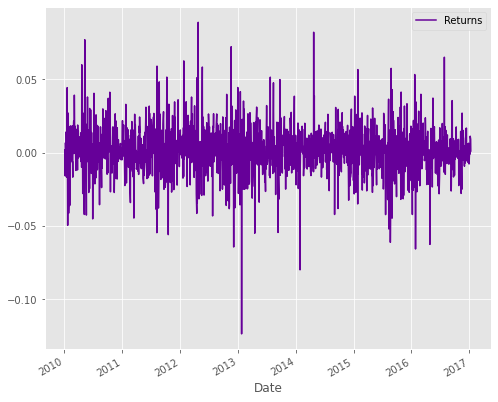

In [ ]:
# stock investment return can be calculated as the percentage change
stock_data['Returns'] = stock_data['Adj Close'].pct_change()
stock_data['Returns'].plot(color='#660099')
plt.legend()

### histograms

((array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   2.,   1.,
           1.,   1.,   3.,   1.,   1.,   3.,   7.,   2.,   9.,   7.,  10.,
          16.,  35.,  27.,  36.,  41.,  60.,  79.,  95., 145., 158., 149.,
         148., 143., 120.,  97.,  94.,  79.,  55.,  24.,  28.,  21.,  20.,
           8.,   6.,   9.,   4.,   2.,   2.,   4.,   1.,   2.,   3.,   1.,
           1.,   0.,   0.,   1.,   1.,   0.,   1.,   0.,   1.]),
  array([-12.35580151, -12.07273638, -11.78967124, -11.50660611,
         -11.22354098, -10.94047584, -10.65741071, -10.37434557,
         -10.09128044,  -9.80821531,  -9.52515017,  -9.24208504,
          -8.95901991,  -8.67595477,  -8.39288964,  -8.10982451,
          -7.82675937,  -7.54369424,  -7.2606291 ,  -6.97756397,
          -6.69449884,  -6.4114337 ,  -6.12836857,  -5.84530344,
          -5.5622383 ,  -5.27917317,  -4.99610804,  -4.7130429 ,
          -4.42997777,  -4.146

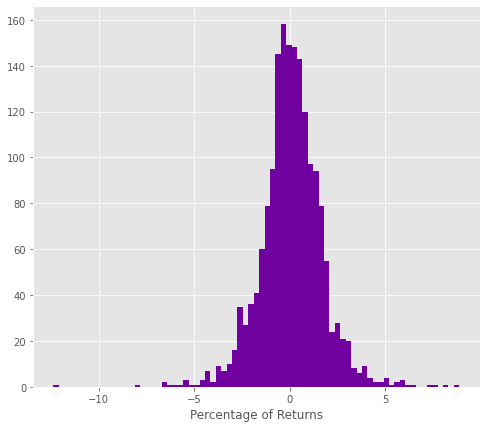

In [ ]:
#this calculates the histogram which shows the distribution of returns
returns_percent = stock_data['Returns'] * 100
returns_percent.dropna(inplace=True)
plt.hist(returns_percent, bins=75, color='#7100a0'), plt.xlabel("Percentage of Returns")

# First three moments in statistics

### first moment

In [ ]:
# numpy: performs numerical calculations
import numpy as np

# the mean of daily and annual returns(first moment)
daily_mean_returns = np.mean(stock_data['Returns'])
print("Daily Mean Returns: " + str(daily_mean_returns))

annual_mean_returns = ((1+ daily_mean_returns)**252)-1
print("Annual Mean Returns: " + str(annual_mean_returns))

Daily Mean Returns: 0.0009587516149071444
Annual Mean Returns: 0.27314429199481416


### second moment

In [ ]:
# find the daily and annual std first
daily_std = np.std(stock_data['Returns'])
print("Daily Standard Deviation " + str(daily_std))
annual_std = daily_std*np.sqrt(252)
print("Annual Standard Deviation " + str(annual_std ))

# backslash n stands for a new line
print('\n')

# this finds the daily and annual variance
daily_var= daily_std**2
print("Daily Variance " + str(daily_var))
annual_var = annual_std**2
print("Annual Variance " + str(annual_var))

Daily Standard Deviation 0.016477808640348025
Annual Standard Deviation 0.26157710288203334


Daily Variance 0.00027151817758792803
Annual Variance 0.06842258075215786


### third moment

In [ ]:
# scipy: performs more stats, utility functions for optimization and signal processing
import scipy 
from scipy.stats import skew

#skewness is the third moment
returns = stock_data['Returns'].dropna()
skewness = skew(returns)
print("Skewness: " + str(skewness))

Skewness: -0.12197940476152884


# Risk assessment taking

## increasing stock model

In [ ]:
# redefine the time range
start = datetime.datetime(2014,4,22)
end = datetime.datetime(2014,5,7)

# repeating the method when finding the returns
stock_data = yf.download(ticker, start, end)
stock_data.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-04-30,21.165714,21.408215,21.064285,21.074642,18.721453,456640800
2014-05-01,21.142857,21.242857,20.941429,21.124287,18.765558,244048000
2014-05-02,21.155001,21.221430,21.061071,21.163570,18.800444,191514400
2014-05-05,21.076429,21.464287,21.071428,21.462856,19.066317,287067200
2014-05-06,21.492857,21.586071,21.228930,21.228930,18.858509,374564400


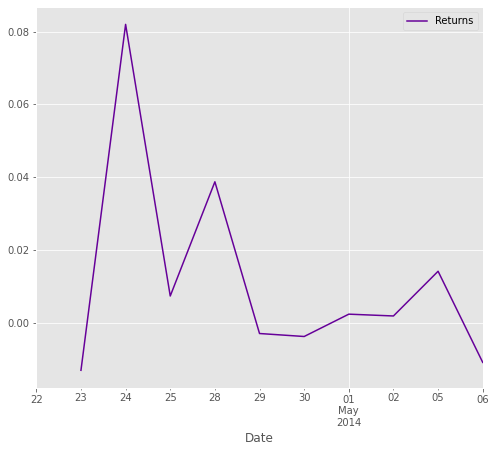

In [ ]:
# plot the graph of returns
stock_data['Returns'] = stock_data['Adj Close'].pct_change()
stock_data['Returns'].plot(color='#660099')
plt.legend()

((array([1., 1., 0., 0., 0., 0., 0., 2., 0., 0., 0., 1., 1., 0., 0., 0., 1.,
         0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 1.]),
  array([-1.30711875, -1.18038155, -1.05364435, -0.92690715, -0.80016996,
         -0.67343276, -0.54669556, -0.41995837, -0.29322117, -0.16648397,
         -0.03974677,  0.08699042,  0.21372762,  0.34046482,  0.46720202,
          0.59393921,  0.72067641,  0.84741361,  0.9741508 ,  1.100888  ,
          1.2276252 ,  1.3543624 ,  1.48109959,  1.60783679,  1.73457399,
          1.86131118,  1.98804838,  2.11478558,  2.24152278,  2.36825997,
          2.49499717,  2.62173437,  2.74847156,  2.87520876,  3.00194596,
          3.12868316,  3.25542035,  3.38215755,  3.50889475,  3.63563194,
          3.76236914,  3.88910634,  4.01584354,  4.14258073, 

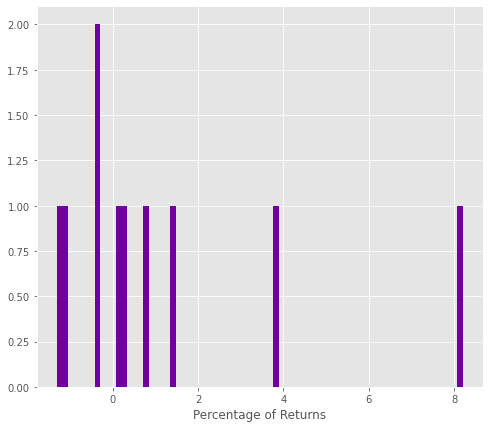

In [ ]:
# find the histogram
returns_percent = stock_data['Returns'] * 100
returns_percent.dropna(inplace=True)
plt.hist(returns_percent, bins=75, color='#7100a0'), plt.xlabel("Percentage of Returns")

In [ ]:
# repeating the methods when finding the three statistical moments
import numpy as np

# first moment - annual mean returns
daily_mean_returns = np.mean(stock_data['Returns'])
print("Daily Mean Returns: " + str(daily_mean_returns))

annual_mean_returns = ((1+ daily_mean_returns)**252)-1
print("Annual Mean Returns: " + str(annual_mean_returns))

Daily Mean Returns: -0.007838372450657919
Annual Mean Returns: -0.862351507739535


In [ ]:
# second moment - annual variance
daily_std = np.std(stock_data['Returns'])
print("Daily Standard Deviation " + str(daily_std))
annual_std = daily_std*np.sqrt(252)
print("Annual Standard Deviation " + str(annual_std ))

print('\n')

daily_var= daily_std**2
print("Daily Variance " + str(daily_var))
annual_var = annual_std**2
print("Annual Variance " + str(annual_var))

Daily Standard Deviation 0.00784033158995686
Annual Standard Deviation 0.12446140549985694


Daily Variance 6.147079944047547e-05
Annual Variance 0.01549064145899982


In [ ]:
import scipy
from scipy.stats import skew

# third moment - skewness
returns = stock_data['Returns'].dropna()
skewness = skew(returns)
print("Skewness: " + str(skewness))

Skewness: -0.6300764473326651


## decreasing stock model

In [ ]:
# get the data for returns
start = datetime.datetime(2016,4,13)
end = datetime.datetime(2016,4,27)
stock_data = yf.download(ticker, start, end)
stock_data.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-04-20,26.660000,27.022499,26.514999,26.782499,24.692822,122444000
2016-04-21,26.732500,26.732500,26.379999,26.492500,24.425455,126210000
2016-04-22,26.252501,26.620001,26.155001,26.420000,24.358618,134732400
2016-04-25,26.250000,26.412500,26.127501,26.270000,24.220318,112126400
2016-04-26,25.977501,26.325001,25.977501,26.087500,24.052057,224064800


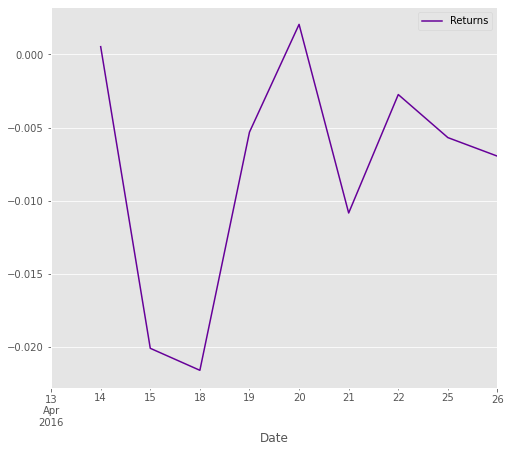

In [ ]:
# plot the return graph
stock_data['Returns'] = stock_data['Adj Close'].pct_change()
stock_data['Returns'].plot(color='#660099')
plt.legend()

((array([1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
         1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 1., 0., 0., 0., 1.]),
  array([-2.15747038, -2.12596078, -2.09445117, -2.06294157, -2.03143197,
         -1.99992236, -1.96841276, -1.93690315, -1.90539355, -1.87388395,
         -1.84237434, -1.81086474, -1.77935514, -1.74784553, -1.71633593,
         -1.68482633, -1.65331672, -1.62180712, -1.59029751, -1.55878791,
         -1.52727831, -1.4957687 , -1.4642591 , -1.4327495 , -1.40123989,
         -1.36973029, -1.33822068, -1.30671108, -1.27520148, -1.24369187,
         -1.21218227, -1.18067267, -1.14916306, -1.11765346, -1.08614385,
         -1.05463425, -1.02312465, -0.99161504, -0.96010544, -0.92859584,
         -0.89708623, -0.86557663, -0.83406702, -0.80255742, 

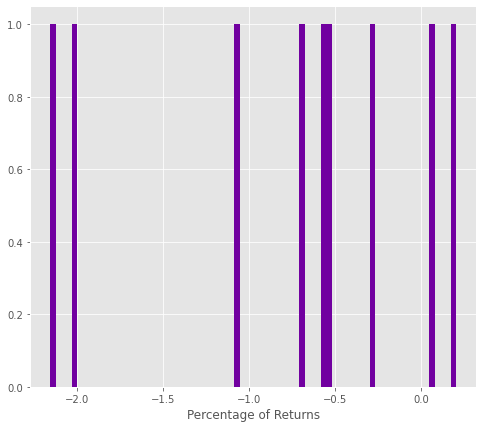

In [ ]:
# histogram
returns_percent = stock_data['Returns'] * 100
returns_percent.dropna(inplace=True)
plt.hist(returns_percent, bins=75, color='#7100a0'), plt.xlabel("Percentage of Returns")

In [ ]:
# first moment
import numpy as np

daily_mean_returns = np.mean(stock_data['Returns'])
print("Daily Mean Returns: " + str(daily_mean_returns))

annual_mean_returns = ((1+ daily_mean_returns)**252)-1
print("Annual Mean Returns: " + str(annual_mean_returns))

Daily Mean Returns: -0.007838372450657919
Annual Mean Returns: -0.862351507739535


In [ ]:
# second moment
daily_std = np.std(stock_data['Returns'])
print("Daily Standard Deviation " + str(daily_std))
annual_std = daily_std*np.sqrt(252)
print("Annual Standard Deviation " + str(annual_std ))

print('\n')

daily_var= daily_std**2
print("Daily Variance " + str(daily_var))
annual_var = annual_std**2
print("Annual Variance " + str(annual_var))

Daily Standard Deviation 0.00784033158995686
Annual Standard Deviation 0.12446140549985694


Daily Variance 6.147079944047547e-05
Annual Variance 0.01549064145899982


In [ ]:
# third moment
import scipy
from scipy.stats import skew

returns = stock_data['Returns'].dropna()
skewness = skew(returns)
print("Skewness: " + str(skewness))

Skewness: -0.6300764473326651


## relatively unchanged stock model

In [ ]:
# get the data for returns
start = datetime.datetime(2014,1,29)
end = datetime.datetime(2014,2,15)
stock_data = yf.download(ticker, start, end)
stock_data.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-02-10,18.523571,18.999643,18.500000,18.892500,16.782961,345559200
2014-02-11,18.950357,19.205357,18.910713,19.141430,17.004099,282256800
2014-02-12,19.176786,19.270000,19.044287,19.139999,17.002825,308100800
2014-02-13,19.094999,19.458929,19.078571,19.443930,17.272818,307398000
2014-02-14,19.373928,19.499287,19.328930,19.428213,17.258856,272924400


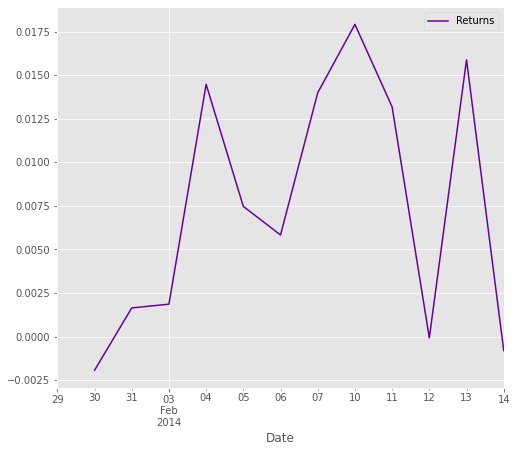

In [ ]:
# plot the return graph
stock_data['Returns'] = stock_data['Adj Close'].pct_change()
stock_data['Returns'].plot(color='#660099')
plt.legend()

((array([1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 1.]),
  array([-0.19374238, -0.16727305, -0.14080372, -0.11433439, -0.08786506,
         -0.06139573, -0.0349264 , -0.00845707,  0.01801226,  0.04448159,
          0.07095092,  0.09742025,  0.12388958,  0.15035891,  0.17682824,
          0.20329757,  0.2297669 ,  0.25623623,  0.28270556,  0.30917489,
          0.33564422,  0.36211355,  0.38858288,  0.41505221,  0.44152154,
          0.46799087,  0.4944602 ,  0.52092953,  0.54739886,  0.57386819,
          0.60033752,  0.62680685,  0.65327618,  0.67974551,  0.70621484,
          0.73268417,  0.7591535 ,  0.78562283,  0.81209216,  0.83856149,
          0.86503082,  0.89150015,  0.91796948,  0.94443881, 

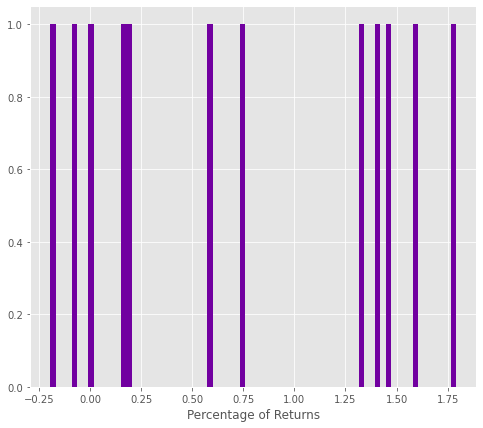

In [ ]:
# histogram
returns_percent = stock_data['Returns'] * 100
returns_percent.dropna(inplace=True)
plt.hist(returns_percent, bins=75, color='#7100a0'), plt.xlabel("Percentage of Returns")

In [ ]:
# first moment
import numpy as np

daily_mean_returns = np.mean(stock_data['Returns'])
print("Daily Mean Returns: " + str(daily_mean_returns))

annual_mean_returns = ((1+ daily_mean_returns)**252)-1
print("Annual Mean Returns: " + str(annual_mean_returns))

Daily Mean Returns: 0.007450947590830537
Annual Mean Returns: 5.492698595058941


In [ ]:
# second moment
daily_std = np.std(stock_data['Returns'])
print("Daily Standard Deviation " + str(daily_std))
annual_std = daily_std*np.sqrt(252)
print("Annual Standard Deviation " + str(annual_std ))

print('\n')

daily_var= daily_std**2
print("Daily Variance " + str(daily_var))
annual_var = annual_std**2
print("Annual Variance " + str(annual_var))

Daily Standard Deviation 0.006988567319468565
Annual Standard Deviation 0.11094006688768264


Daily Variance 4.8840073178744036e-05
Annual Variance 0.012307698441043497


In [ ]:
# third moment
import scipy
from scipy.stats import skew

returns = stock_data['Returns'].dropna()
skewness = skew(returns)
print("Skewness: " + str(skewness))

Skewness: 0.08929911974720783
